# Exploratory Data Analysis (EDA)

The purpose of this task is to understand data using statistics and draw meaningful visualizations with basic feature-level inferences from the same.

## Import necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load Dataset

In [6]:
df=pd.read_csv("loan_data_1.csv")
df.head(5)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [7]:
df.describe(include=["object"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,375,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,274,325,149,271


# 1.Generating summary statistics

## Numerical Features

The numerical features summary statistics apply to columns such as ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [15]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

summary_stats = df[num_cols].describe().T
summary_stats['median'] = df[num_cols].median()
summary_stats['missing_values'] = df[num_cols].isnull().sum()
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,missing_values
ApplicantIncome,369.0,3563.422764,1427.371257,150.0,2583.0,3326.0,4226.0,9703.0,3326.0,12
CoapplicantIncome,363.0,1267.005289,2388.048316,0.0,0.0,830.0,2008.0,33837.0,830.0,18
LoanAmount,373.0,104.914209,28.484822,9.0,90.0,110.0,127.0,150.0,110.0,8
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0,360.0,11
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0,1.0,30


The mean is slightly higher than the median which tells the distribution of ApplicantIncome is right-skewed. The dataset has a few high-income outliers,but most applicant incomes are concentrated around the median (3326). However, a few high-income applicants can distort the mean, so using median for analysis is more efficient.
Coapplicant income has high variance and strong skewness, likely affecting loan approval behavior. And also the majority of loans are long-term. Short-term loans are rare and might represent a different loan product category.
Credit_history is probably a strong predictor of loan approval 

## Categorical Features

For categorical(type object)features we can use value_counts method and to view relative frequencies specify the value normalize=True.

In [10]:
df["Married"].value_counts(normalize=True)

Married
Yes    0.598425
No     0.401575
Name: proportion, dtype: float64

As we can see, 59% (0.59) of debtor are married, which must be taken into account that marital status affects the eligibility of loan

In [18]:
cat_cols = ['Gender', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    print(f"--- {col} ---")
    print("Value Counts:")
    print(df[col].value_counts(dropna=False), '\n')
    print("Mode:", df[col].mode()[0])
    print("Unique Values:", df[col].nunique())
    print("Missing Values:", df[col].isnull().sum(), '\n')


--- Gender ---
Value Counts:
Gender
Male      291
Female     85
NaN         5
Name: count, dtype: int64 

Mode: Male
Unique Values: 2
Missing Values: 5 

--- Education ---
Value Counts:
Education
Graduate        274
Not Graduate    101
NaN               6
Name: count, dtype: int64 

Mode: Graduate
Unique Values: 2
Missing Values: 6 

--- Self_Employed ---
Value Counts:
Self_Employed
No     325
Yes     35
NaN     21
Name: count, dtype: int64 

Mode: No
Unique Values: 2
Missing Values: 21 

--- Property_Area ---
Value Counts:
Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64 

Mode: Semiurban
Unique Values: 3
Missing Values: 0 

--- Loan_Status ---
Value Counts:
Loan_Status
Y    271
N    110
Name: count, dtype: int64 

Mode: Y
Unique Values: 2
Missing Values: 0 



- Majority of applicants are Male (291 out of 376 known values), making up nearly 77% of the dataset.The mode is Male, indicating that the dataset is male-dominated.<br>
- Graduates make up the majority.Education level play a role in loan approval, as a higher number of applicants are graduates. Further analysis  explores if graduates have higher approval rates or request larger loans.<br>
- Since distribution is relatively balanced, property area is a meaningful feature for analysis. 

# 2.Visualizing Numerical Features

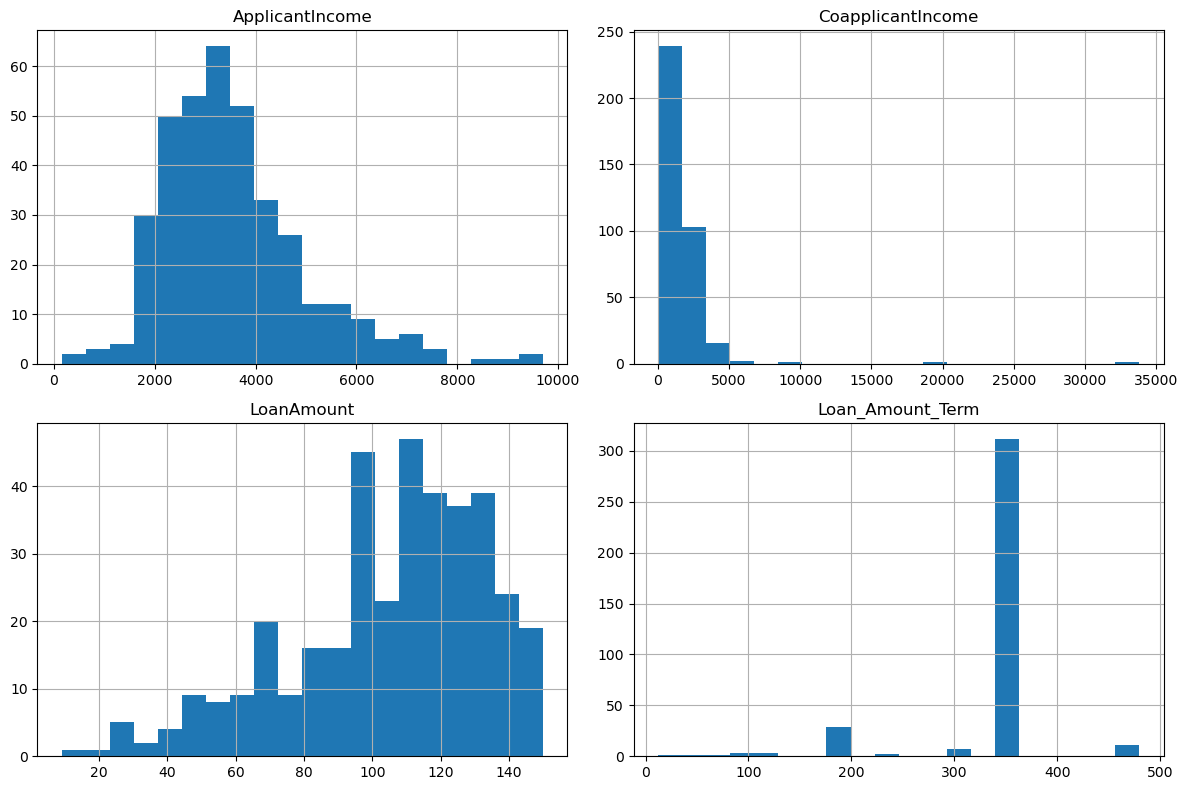

In [19]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.tight_layout()
plt.show()

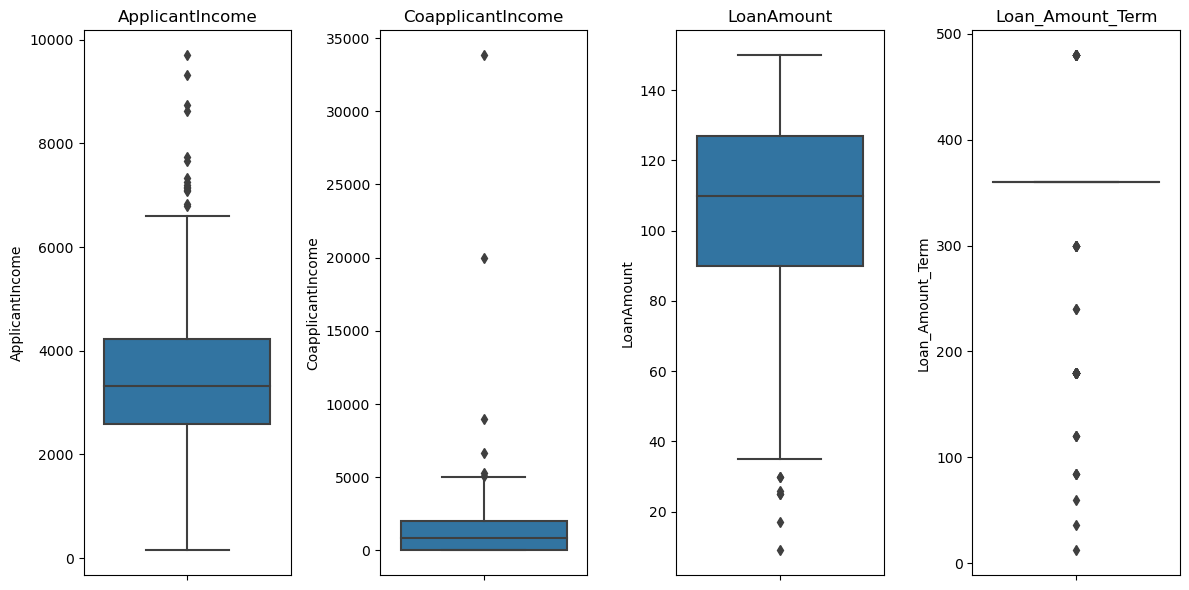

In [20]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# 3.Correlation matrix for feature relationships

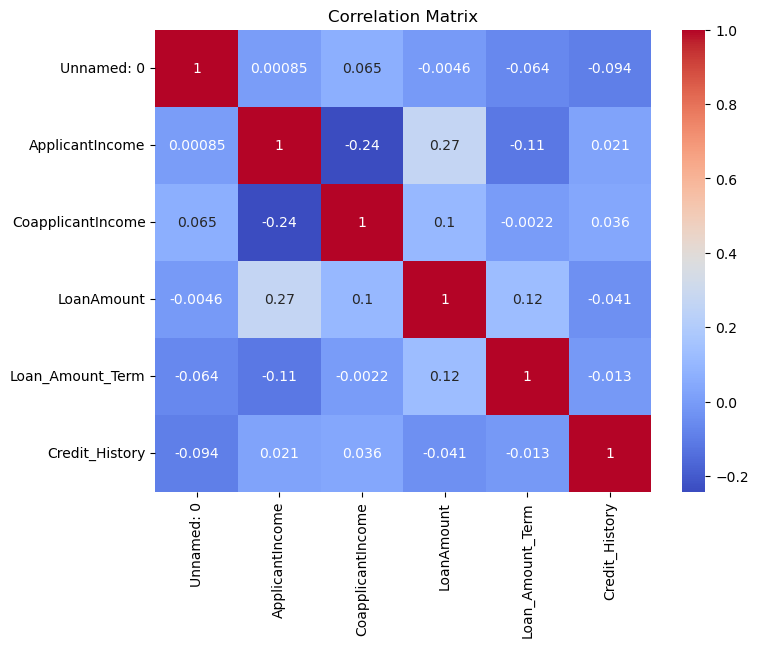

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 4.Possible inferences from data visual

- ApplicantIncome and CoApplicantIncome have negative correlation. This weak negative correlation suggests that there isn't a strong inverse relationship between the applicant's income and the coapplicant's income.Applicants with higher incomes might not rely as much on coapplicants
- A positive correlation of 0.12 means that, in general, as the LoanAmount increases, the Loan_Amount_Term (the duration for repayment of the loan) tends to increase slightly. However, the relationship is very weak, meaning the two variables are almost independent.
- There is almost no relationship between ApplicantIncome and Loan_Amount_Term, suggesting that applicants' income levels do not significantly influence the length of their loan repayment terms. This could imply that loan terms might be pre-defined (e.g., 360 months for mortgages), and are independent of the applicant's income.
- There is no significant relationship between ApplicantIncome and Credit_History. This suggests that an applicant's income level does not strongly influence their credit history.

